In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [213]:
data1=pd.read_csv(r"C:\Users\khand\WorldCupMatches.csv")
data2=pd.read_csv(r"C:\Users\khand\WorldCupPlayers.csv")
data3=pd.read_csv(r"C:\Users\khand\WorldCups.csv")

In [214]:
data1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [215]:
data2.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [216]:
data3.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [217]:
import plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()


In [218]:
# Now collaborating for first three positions we are having 
# Data preparation
data_winner = data3['Winner'].value_counts().reset_index()
data_winner.columns = ['Country', 'Wins']

data_runner_up = data3['Runners-Up'].value_counts().reset_index()
data_runner_up.columns = ['Country', 'Runner-ups']

data_third = data3['Third'].value_counts().reset_index()
data_third.columns = ['Country', 'Third-place']

# Creating bar charts
fig_winner = px.bar(data_winner.head(3), x='Country', y='Wins', title='Top 3 FIFA World Cup Winners')
fig_runner_up = px.bar(data_runner_up.head(3), x='Country', y='Runner-ups', title='Top 3 FIFA World Cup Runner-ups')
fig_third = px.bar(data_third.head(3), x='Country', y='Third-place', title='Top 3 FIFA World Cup Third-placed Teams')

# Displaying the plots
fig_winner.show()
fig_runner_up.show()
fig_third.show()

In [219]:
data_winner.head()

,Country,Wins
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Uruguay,2
4,Argentina,2


In [220]:
data_runner_up.head()

,Country,Runner-ups
0,Argentina,3
1,Germany FR,3
2,Netherlands,3
3,Czechoslovakia,2
4,Hungary,2


In [221]:
data_third.head()


,Country,Third-place
0,Germany,3
1,Brazil,2
2,Sweden,2
3,France,2
4,Poland,2


In [222]:
teams = pd.concat([data_winner, data_runner_up, data_third], axis = 1)
teams

,Country,Wins,Country,Runner-ups,Country,Third-place
0,Brazil,5.0,Argentina,3.0,Germany,3
1,Italy,4.0,Germany FR,3.0,Brazil,2
2,Germany FR,3.0,Netherlands,3.0,Sweden,2
3,Uruguay,2.0,Czechoslovakia,2.0,France,2
4,Argentina,2.0,Hungary,2.0,Poland,2
5,England,1.0,Brazil,2.0,USA,1
6,France,1.0,Italy,2.0,Austria,1
7,Spain,1.0,Sweden,1.0,Chile,1
8,Germany,1.0,Germany,1.0,Portugal,1
9,NaN,NaN,France,1.0,Germany FR,1


In [223]:
# Dealing with NaN values

teams.fillna(0,inplace=True)

In [224]:
teams=teams.astype(int)

ValueError: invalid literal for int() with base 10: 'Brazil'

In [225]:
#A complete despection of number of world cups won, first runner-up, and second runner-up positions by various participating teams
# Combine data for winners, runners-up, and third-placed teams
team_counts = pd.concat([data3['Winner'].value_counts(), 
                         data3['Runners-Up'].value_counts(), 
                         data3['Third'].value_counts()], axis=1, sort=True)

# Rename columns
team_counts.columns = ['Wins', 'Runner-ups', 'Third-place']

# Fill NaN values with zeros
team_counts.fillna(0, inplace=True)

# Calculate total number of appearances
team_counts['Total Appearances'] = team_counts.sum(axis=1)

# Sort teams based on total appearances
team_counts.sort_values(by='Total Appearances', ascending=False, inplace=True)

# Show the description
team_counts.iplot(kind='bar',yTitle='Count',title='Description of FIFA World Cup Performances by Various Teams',xTitle='Country')

In [226]:
# Seperating data based on goals scored by teams
data_home=data1[['Home Team Name','Home Team Goals']].dropna()
data_away=data1[['Away Team Name','Away Team Goals']].dropna()

In [227]:
data_home.head()

,Home Team Name,Home Team Goals
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1


In [228]:
data_away.head()

,Away Team Name,Away Team Goals
0,Mexico,1
1,Belgium,0
2,Brazil,1
3,Peru,1
4,France,0


In [229]:
# Setting up the columns in both the tables
data_home.columns= ['Countries','Goals']
data_away.columns= ['Countries','Goals']

In [230]:
data_country_goals = pd.concat([data_home, data_away], ignore_index=True)
data_country_goals

,Countries,Goals
0,France,4
1,USA,3
2,Yugoslavia,2
3,Romania,3
4,Argentina,1
...,...,...
1699,Costa Rica,0
1700,Germany,7
1701,Argentina,0
1702,Netherlands,3


In [231]:
# The above table do contain all the goals both home and away but con have different values for same countries, so...

data_final_country_goal=data_country_goals.groupby('Countries').sum()

In [232]:
# Arranging by number of goals
final_data=data_final_country_goal.sort_values(by='Goals',ascending=False)

In [233]:
final_data=final_data[:10]
final_data

,Goals
Countries,
Brazil,225
Argentina,133
Germany FR,131
Italy,128
France,108
Germany,104
Spain,92
Netherlands,91
Hungary,87


In [234]:
#Countries with Maximum Number of Goals in FIFA World Cup History
import plotly.graph_objs as go

# Create a bar trace
bar_trace = go.Bar(
    x=final_data.index,  # Countries
    y=final_data['Goals'],  # Number of goals
    marker=dict(color='red')  # Bar color
)

# Create layout
layout = go.Layout(
    title='Countries with Maximum Number of Goals in FIFA World Cup History',
    xaxis=dict(title='Country'),  # X-axis label
    yaxis=dict(title='Number of Goals')  # Y-axis label
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the plot
fig.show()

In [235]:
# Comparing half time home goals scored and half time away goals scored

half_team_home=pd.DataFrame(data1[['Home Team Name','Half-time Home Goals']])
half_team_home = half_team_home.groupby('Home Team Name').sum()
half_team_home = half_team_home.sort_values(by='Half-time Home Goals',ascending=False)
half_team_home



,Half-time Home Goals
Home Team Name,
Brazil,66
Argentina,48
Germany FR,38
Italy,36
Hungary,33
...,...
Norway,0
Iran,0
New Zealand,0


In [236]:
half_team_away=pd.DataFrame(data1[['Away Team Name','Half-time Away Goals']])
half_team_away = half_team_away.groupby('Away Team Name').sum()
half_team_away = half_team_away.sort_values(by='Half-time Away Goals',ascending=False)
half_team_away

,Half-time Away Goals
Away Team Name,
Spain,20
Germany,18
Netherlands,18
France,17
Brazil,17
...,...
China PR,0
Dutch East Indies,0
Slovenia,0


In [237]:
# Concatinating both the tables on team name
total = pd.concat([half_team_home, half_team_away], axis = 1)
total

,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17
Argentina,48.0,8
Germany FR,38.0,12
Italy,36.0,13
Hungary,33.0,7
...,...,...
Egypt,NaN,2
Israel,NaN,0
Kuwait,NaN,0
El Salvador,NaN,0


In [238]:
# Creating total goals columns to order the table based on total number of goals scored by a team
total['total_goals'] = total['Half-time Home Goals'] + total['Half-time Away Goals']
total = total.sort_values(by= 'total_goals',ascending=False)
total=total[:10]
total

,Half-time Home Goals,Half-time Away Goals,total_goals
Brazil,66.0,17,83.0
Argentina,48.0,8,56.0
Germany FR,38.0,12,50.0
Italy,36.0,13,49.0
Germany,28.0,18,46.0
France,25.0,17,42.0
Hungary,33.0,7,40.0
Netherlands,19.0,18,37.0
Spain,16.0,20,36.0
Uruguay,27.0,6,33.0


In [239]:
# We don't require total_goals anymore, so...
total.pop('total_goals')
total

,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17
Argentina,48.0,8
Germany FR,38.0,12
Italy,36.0,13
Germany,28.0,18
France,25.0,17
Hungary,33.0,7
Netherlands,19.0,18
Spain,16.0,20
Uruguay,27.0,6


In [240]:
#Brazil has again scored a majority of total goals playing as home team whereas spain scored more goals playing as away country rather than home country
total.iplot(kind='bar',yTitle='Count',title='Country wise analysis',xTitle='Country')

In [241]:
# We didn't considered draw matches here because in many cells we had NaN values given which corresponded to 0 values and could
# had made our pie chart biased.

def winner(data1):
    if data1['Home Team Goals'] > data1['Away Team Goals']:
        return 'Home team won'
    elif data1['Home Team Goals'] < data1['Away Team Goals']:
        return 'Away Team won'

In [242]:
data1['winner']=data1.apply(lambda x:winner(x),axis=1)

In [243]:
data1['winner'].value_counts()

winner
Home team won    488
Away Team won    174
Name: count, dtype: int64

In [244]:
# Filter out draw matches where home team goals and away team goals are both 0
non_draw_matches = data1[(data1['Half-time Home Goals'] != 0) | (data1['Half-time Away Goals'] != 0)]

# Calculate the total number of half-time home goals scored
total_home_goals = non_draw_matches['Half-time Home Goals'].sum()

# Calculate the total number of half-time away goals scored
total_away_goals = non_draw_matches['Half-time Away Goals'].sum()

# Create a bar trace for half-time home goals
home_trace = go.Bar(
    x=['Half-time Home Goals'],
    y=[total_home_goals],
    name='Half-time Home Goals',
    marker=dict(color='blue')
)

# Create a bar trace for half-time away goals
away_trace = go.Bar(
    x=['Half-time Away Goals'],
    y=[total_away_goals],
    name='Half-time Away Goals',
    marker=dict(color='green')
)

# Create layout
layout = go.Layout(
    title='Comparison of Half-time Home Goals and Half-time Away Goals (Excluding Draw Matches)',
    yaxis=dict(title='Total Goals')
)

# Create figure
fig = go.Figure(data=[home_trace, away_trace], layout=layout)

# Show the plot
fig.show()

In [245]:
#73.6 % of the matches were won by home team while 26.4 % were won by away team. 

In [246]:
data2['Team Initials'].unique()

array(['FRA', 'MEX', 'USA', 'BEL', 'YUG', 'BRA', 'ROU', 'PER', 'ARG',
       'CHI', 'BOL', 'PAR', 'URU', 'AUT', 'HUN', 'EGY', 'SUI', 'NED',
       'SWE', 'GER', 'ESP', 'ITA', 'TCH', 'INH', 'CUB', 'NOR', 'POL',
       'ENG', 'SCO', 'FRG', 'TUR', 'KOR', 'URS', 'WAL', 'NIR', 'COL',
       'BUL', 'PRK', 'POR', 'ISR', 'MAR', 'SLV', 'GDR', 'AUS', 'ZAI',
       'HAI', 'TUN', 'IRN', 'CMR', 'NZL', 'ALG', 'HON', 'KUW', 'CAN',
       'IRQ', 'DEN', 'UAE', 'CRC', 'IRL', 'KSA', 'RUS', 'GRE', 'NGA',
       'RSA', 'JPN', 'JAM', 'CRO', 'SEN', 'SVN', 'ECU', 'CHN', 'TRI',
       'CIV', 'SCG', 'ANG', 'CZE', 'GHA', 'TOG', 'UKR', 'SRB', 'SVK',
       'BIH'], dtype=object)

In [247]:
data_nat = pd.DataFrame(data2[['Team Initials','Player Name']])
data_nat.head()

,Team Initials,Player Name
0,FRA,Alex THEPOT
1,MEX,Oscar BONFIGLIO
2,FRA,Marcel LANGILLER
3,MEX,Juan CARRENO
4,FRA,Ernest LIBERATI


In [248]:
d2 = pd.DataFrame(data_nat['Team Initials'].value_counts())
d2

,count
Team Initials,
BRA,2403
ITA,1843
ARG,1807
ENG,1378
FRG,1364
...,...
KUW,66
CAN,66
UAE,66


In [249]:
d2.iplot(kind='bar',yTitle='No of players',title='Country codes vs number of players played',colors='blue',xTitle='Country code')



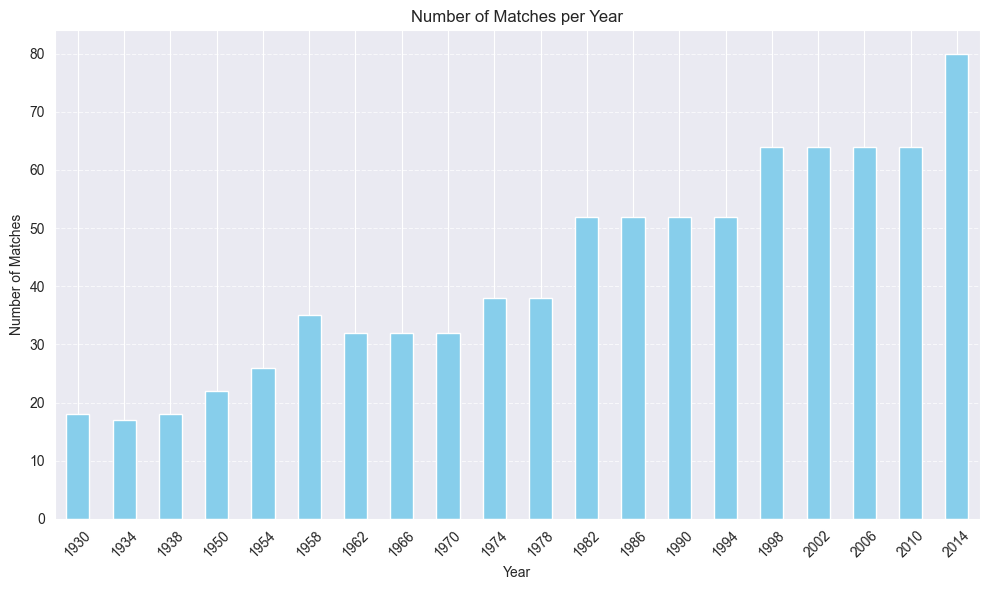

In [250]:
#Matches Per Year
matches_per_year = data1['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
matches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Matches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('matches_per_year.png')
plt.show()

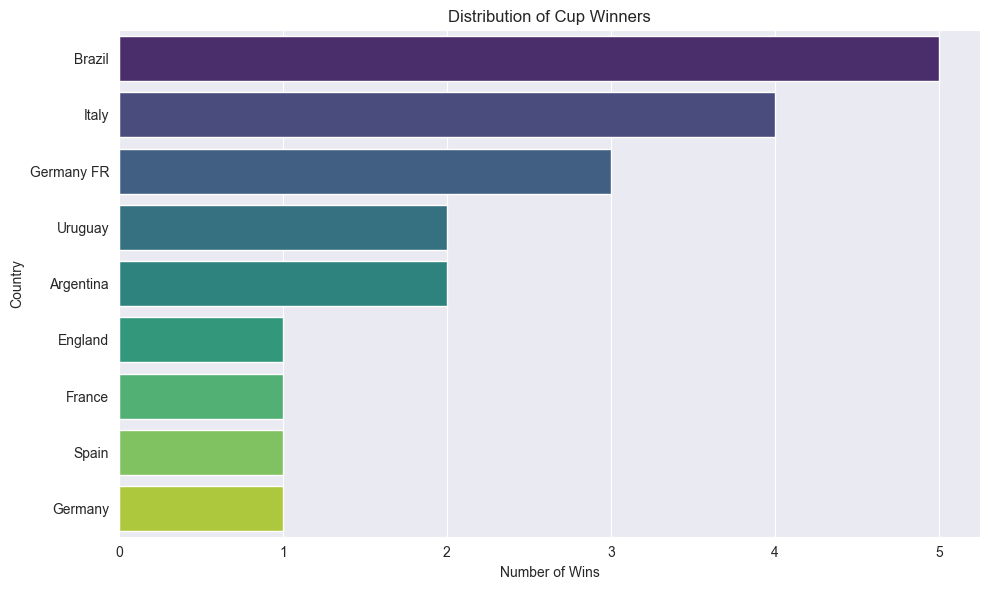

In [251]:
### Distribution of Cup Winners
cup_winners_distribution = data3['Winner'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=cup_winners_distribution.values, y=cup_winners_distribution.index, palette='viridis')
plt.title('Distribution of Cup Winners')
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('cup_winners_distribution.png')
plt.show()